<a href="https://colab.research.google.com/github/diperezbgit/IA-FUNDAMENTALS/blob/main/TAREA_2/TAREA_2_HC_SA_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Vehicle Routing Problem (VRP) para Optimización de Rutas en Conexiones Eléctricas
### Se tiene una cuadrilla encargada de atender un conjunto de conexiones eléctricas distribuidas en diferentes distritos. El objetivo es optimizar el tiempo total de atención mediante la determinación del orden óptimo en que la cuadrilla debe visitar cada punto de conexión.




### Carga y visualización de imagen GIS para la asignación de conexiones eléctricas


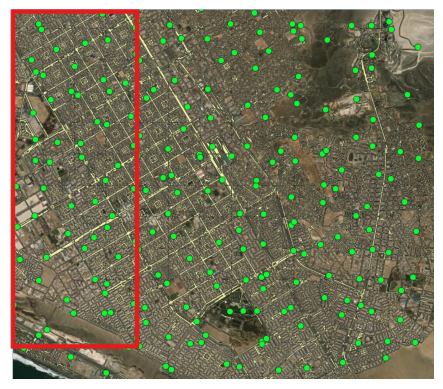

In [68]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = 'https://raw.githubusercontent.com/diperezbgit/IA-FUNDAMENTALS/main/TAREA_2/cnx_gis.png'

response = requests.get(url)
img = Image.open(BytesIO(response.content))

plt.imshow(img)
plt.axis('off')  # Quita los ejes
plt.show()


### Importamos el archivo de distancias entre las órdenes de conexiones eléctricas. Se asigna valor cero en la diagonal (el sistema GIS no devuelve la distancia cuando se trata del mismo punto)



In [76]:
import pandas as pd
import numpy as np
#  obtenemos al archivo que contiene la informacion sobre las conexiones y ditancias entre ellas
path = "https://raw.githubusercontent.com/diperezbgit/IA-FUNDAMENTALS/main/TAREA_2/cnx_cuadri02.csv"
df_long = pd.read_csv(path)
df_matrix = df_long.pivot(index='InputID', columns='TargetID', values='Distance')

# completamos el dato "0" en la diagonal
all_ids = sorted(set(df_long['InputID']).union(set(df_long['TargetID'])))
df_matrix = df_matrix.reindex(index=all_ids, columns=all_ids)

np.fill_diagonal(df_matrix.values, 0)

#reducimos el array a 70x70 para agilizar la prueba
df_reduced = df_matrix.iloc[:70, :70]

# Convierte el DataFrame en un numpy array
matriz_numpy = df_reduced.values

print(matriz_numpy.shape)


(70, 70)


In [77]:
N = matriz_numpy.shape[0] # cantidad de ciudades
positions = np.random.rand(N, 2) # generar las ciudades
TSP = matriz_numpy
TSP

array([[   0.        ,  515.02855382,  941.49418385, ..., 6069.80572263,
        1997.04558721, 2459.0998557 ],
       [ 515.02855382,    0.        ,  587.44979381, ..., 5668.65791078,
        1576.64042272, 2074.39513473],
       [ 941.49418385,  587.44979381,    0.        , ..., 5130.46570938,
        1804.16808335, 2333.27415779],
       ...,
       [6069.80572263, 5668.65791078, 5130.46570938, ...,    0.        ,
        5636.43910081, 5921.39591621],
       [1997.04558721, 1576.64042272, 1804.16808335, ..., 5636.43910081,
           0.        ,  530.60525423],
       [2459.0998557 , 2074.39513473, 2333.27415779, ..., 5921.39591621,
         530.60525423,    0.        ]])

# HC con ploT

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

def plot_tsp(nodes, route):
    """
    Plot the TSP nodes and route.

    Parameters:
    - nodes: List of tuples containing the coordinates of each node.
    - route: List of node indices representing the TSP route.
    """
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  # Plot nodes


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    node1 = route[-1]
    node2 = route[0]
    plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

# Prueba por  Hill Climbing

In [79]:
def fitness(sol,TSP):
  distance = 0
  for i in range( len(sol) - 1 ):
    distance = distance + TSP[ sol[i]  ][ sol[i+1]  ]
  return distance

def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range( i + 1, len(sol) ):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)
  return neighbors

def hill_climbing(num_cnx,positions,TSP):
  # step 1: Solucion inicial
  current_solution = np.array(range(num_cnx))
  np.random.shuffle(current_solution)

  plot_tsp(positions, current_solution)

  while True:
    print("Iteration...")
    # step: generar vecinos
    neighbors = get_neighbors(current_solution)
    best_neighbor = min(neighbors, key=lambda current_solution: fitness(current_solution, TSP))

    #print("current_solution", current_solution)
    print("fitness current_solution", fitness(current_solution,TSP))
    print("fitness best_neighbor", fitness(best_neighbor,TSP))

    if fitness(best_neighbor,TSP) < fitness(current_solution,TSP):
      current_solution = best_neighbor
    else:
      return current_solution

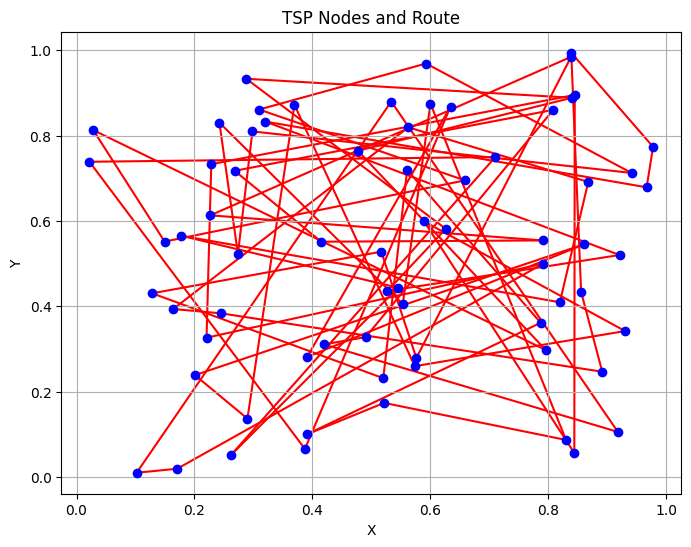

Iteration...
fitness current_solution 170619.61381713173
fitness best_neighbor 157284.7522728268
Iteration...
fitness current_solution 157284.7522728268
fitness best_neighbor 145981.0385391966
Iteration...
fitness current_solution 145981.0385391966
fitness best_neighbor 137400.6649424662
Iteration...
fitness current_solution 137400.6649424662
fitness best_neighbor 129244.35631525656
Iteration...
fitness current_solution 129244.35631525656
fitness best_neighbor 121715.53644686315
Iteration...
fitness current_solution 121715.53644686315
fitness best_neighbor 114951.80024135007
Iteration...
fitness current_solution 114951.80024135007
fitness best_neighbor 108959.68055989975
Iteration...
fitness current_solution 108959.68055989975
fitness best_neighbor 103919.51266487138
Iteration...
fitness current_solution 103919.51266487138
fitness best_neighbor 100287.03795265901
Iteration...
fitness current_solution 100287.03795265901
fitness best_neighbor 96882.51582561973
Iteration...
fitness curren

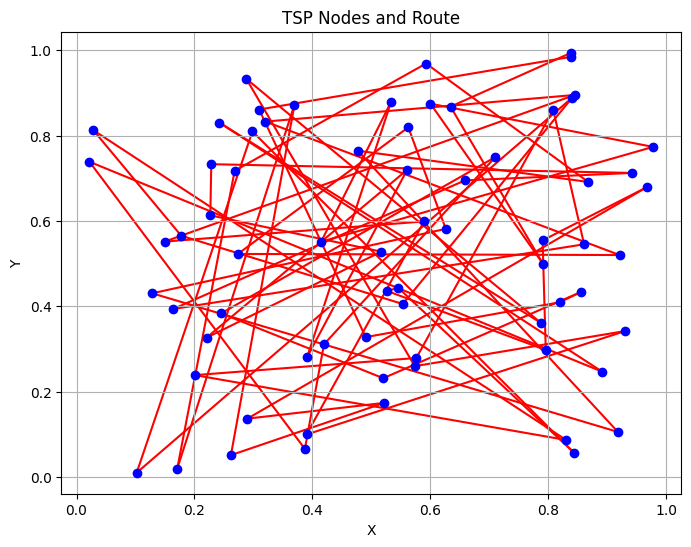


 'good' solution: [69 68 48 50 51 40 27 14 13 11 10  9  7 21  6  2  0  1  3 16 31 49 33 53
 34 36 20  5  4 17 19 39 60 63 43 64 44 41 42  8 23 18 35 46 67 66 65 62
 32 15 30 47 52 58 61 45 29 28 26 12 25 24 22 38 55 54 56 37 57 59]


In [80]:
N = matriz_numpy.shape[0] # cantidad de ciudades
positions = np.random.rand(N, 2)
TSP = matriz_numpy

solution = hill_climbing(N,positions,TSP)
plot_tsp(positions, solution)

print("\n 'good' solution:", solution)


